In [187]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn

In [188]:
data  = pd.read_csv("/Users/kylebradley/Downloads/basketball_teams.csv")

In [189]:
data = data[data['year'] >=2001]



In [190]:
data.head()


,year,lgID,tmID,franchID,confID,divID,rank,confRank,playoff,name,...,divWon,divLoss,pace,won,lost,games,min,arena,attendance,bbtmID
1071,2001,NBA,ATL,ATL,EC,CD,6,12,NaN,Atlanta Hawks,...,11,17,0,33,49,82,19780.0,Philips Arena,32767,ATL
1072,2001,NBA,BOS,BOS,EC,AT,2,3,CF,Boston Celtics,...,17,7,0,49,33,82,19830.0,FleetCenter,32767,BOS
1073,2001,NBA,CHH,NOH,EC,CD,2,4,CS,Charlotte Hornets,...,17,11,0,44,38,82,19755.0,Charlotte Coliseum,32767,CHA
1074,2001,NBA,CHI,CHI,EC,CD,8,15,NaN,Chicago Bulls,...,5,23,0,21,61,82,19805.0,United Center,32767,CHI
1075,2001,NBA,CLE,CLE,EC,CD,7,14,NaN,Cleveland Cavaliers,...,12,16,0,29,53,82,19855.0,Gund Arena,32767,CLE


In [191]:
data.columns

Index(['year', 'lgID', 'tmID', 'franchID', 'confID', 'divID', 'rank',
       'confRank', 'playoff', 'name', 'o_fgm', 'o_fga', 'o_ftm', 'o_fta',
       'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf',
       'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta',
       'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb', 'd_reb', 'd_asts', 'd_pf',
       'd_stl', 'd_to', 'd_blk', 'd_pts', 'o_tmRebound', 'd_tmRebound',
       'homeWon', 'homeLost', 'awayWon', 'awayLost', 'neutWon', 'neutLoss',
       'confWon', 'confLoss', 'divWon', 'divLoss', 'pace', 'won', 'lost',
       'games', 'min', 'arena', 'attendance', 'bbtmID'],
      dtype='object')

In [192]:
data['winpct'] = data.won / 82.0
data['o_fgpct'] = data.o_fgm/data.o_fga
data['d_fgpct'] = data.d_fgm/data.o_fga
data['o_3pct'] = data.o_3pm/data.o_3pa
data['d_3pct'] = data.d_3pm/data.d_3pa
data['o_oreb'] = data.o_oreb/82.0
data['o_dreb'] = data.o_dreb/82.0
data['d_oreb'] = data.d_oreb/82.0
data['d_dreb'] = data.o_oreb/82.0
data['o_reb'] = data.o_oreb + data.o_dreb
data['d_reb'] = data.d_oreb + data.d_dreb
data['o_pts'] = data.o_pts / 82.0
data['d_pts'] = data.d_pts /82.0
data['o_asts'] = data.o_asts/82.0
data['d_asts'] = data.d_asts/82.0
data['d_stl'] = data.d_stl/82.0
data['o_stl'] = data.o_stl/82.0
data['d_to'] = data.d_to/82.0
data['o_to'] = data.o_to/82.0
data['d_blk'] = data.d_blk/82.0
data['o_blk'] = data.o_blk/82.0


In [193]:
data[['tmID', 'winpct', 'year']]

,tmID,winpct,year
1071,ATL,0.402439,2001
1072,BOS,0.597561,2001
1073,CHH,0.536585,2001
1074,CHI,0.256098,2001
1075,CLE,0.353659,2001
1076,DAL,0.695122,2001
1077,DEN,0.329268,2001
1078,DET,0.609756,2001
1079,GSW,0.256098,2001
1080,HOU,0.341463,2001


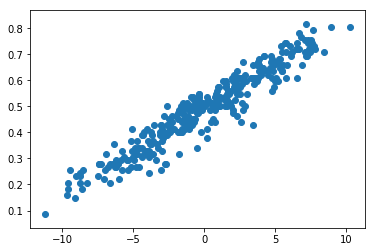

In [194]:
plt.scatter(data.o_pts-data.d_pts, data.winpct)
plt.show()

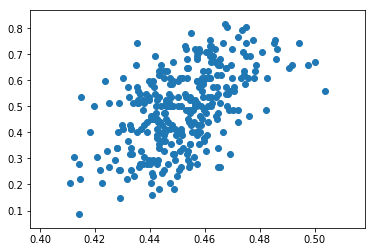

In [195]:
plt.scatter(data.o_fgm/data.o_fga, data.winpct)
plt.show()

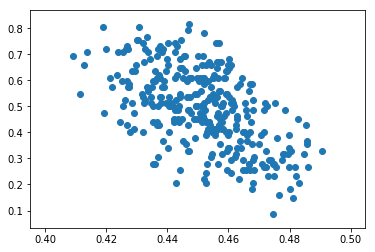

In [196]:
plt.scatter(data.d_fgm/data.d_fga, data.winpct)
plt.show()

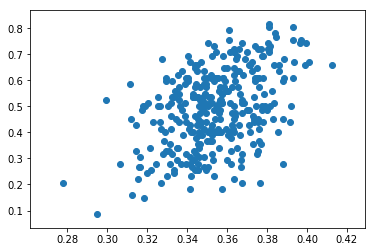

In [197]:
plt.scatter(data.o_3pct, data.winpct)
plt.show()

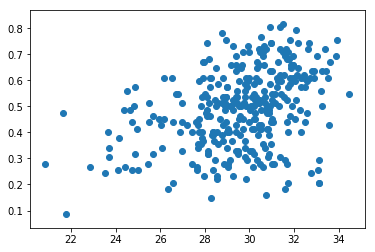

In [198]:
plt.scatter(data.o_reb - data.d_reb, data.winpct)
plt.show()

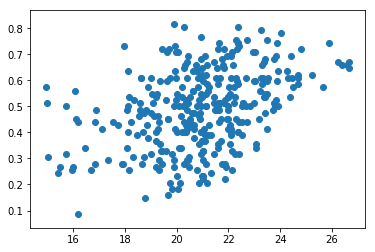

In [199]:
plt.scatter(data.o_asts, data.winpct)
plt.show()

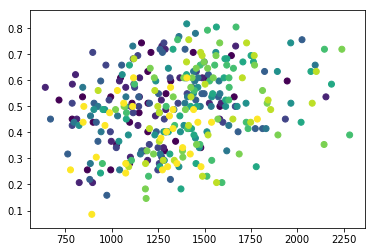

In [200]:
plt.scatter(data.o_3pa, data.winpct, c = data.year)
plt.show()

In [201]:
model = linear_model.LinearRegression()

In [202]:
train, test = sklearn.model_selection.train_test_split(data, test_size = .33)

In [203]:
test

,year,lgID,tmID,franchID,confID,divID,rank,confRank,playoff,name,...,games,min,arena,attendance,bbtmID,winpct,o_fgpct,d_fgpct,o_3pct,d_3pct
1312,2009,NBA,CLE,CLE,EC,CD,1,0,CS,Cleveland Cavaliers,...,0,NaN,NaN,0,NaN,0.743902,0.485214,0.459240,0.380531,0.792344
1384,2011,NBA,MIN,MIN,WC,NW,5,0,NaN,Minnesota Timberwolves,...,0,NaN,NaN,0,NaN,0.317073,0.433382,0.473316,0.332396,0.339749
1207,2005,NBA,NYK,NYK,EC,AT,5,15,NaN,New York Knicks,...,82,19930.0,Madison Square Garden (IV),32767,NYK,0.280488,0.454721,0.478086,0.361991,0.602823
1368,2011,NBA,ATL,ATL,EC,SE,2,0,C1,Atlanta Hawks,...,0,NaN,NaN,0,NaN,0.487805,0.454188,0.445026,0.369925,0.343887
1147,2003,NBA,NYK,NYK,EC,AT,3,7,C1,New York Knicks,...,82,19880.0,Madison Square Garden (IV),32767,NYK,0.475610,0.442346,0.427606,0.364126,0.558690
1392,2011,NBA,POR,POR,WC,NW,4,0,NaN,Portland Trail Blazers,...,0,NaN,NaN,0,NaN,0.341463,0.443419,0.457080,0.345876,0.363188
1239,2006,NBA,PHI,PHI,EC,AT,3,10,NaN,Philadelphia 76ers,...,82,19880.0,Wachovia Center,32767,NaN,0.426829,0.457553,0.474251,0.345079,0.739356
1361,2010,NBA,PHO,PHO,WC,PC,2,0,NaN,Phoenix Suns,...,0,NaN,NaN,0,NaN,0.487805,0.470339,0.483489,0.377491,0.366771
1321,2009,NBA,MEM,MEM,WC,SW,4,0,NaN,Memphis Grizzlies,...,0,NaN,NaN,0,NaN,0.487805,0.468800,0.476655,0.337255,0.870829
1167,2004,NBA,HOU,HOU,WC,SW,3,5,C1,Houston Rockets,...,82,19855.0,Toyota Center,32767,HOU,0.621951,0.443371,0.423742,0.363577,0.634688


In [204]:
train

,year,lgID,tmID,franchID,confID,divID,rank,confRank,playoff,name,...,games,min,arena,attendance,bbtmID,winpct,o_fgpct,d_fgpct,o_3pct,d_3pct
1217,2005,NBA,WAS,WAS,EC,SE,2,5,C1,Washington Wizards,...,82,19830.0,MCI Center,32767,WSW,0.512195,0.446965,0.452825,0.356528,0.620612
1230,2006,NBA,LAL,LAL,WC,PC,2,7,C1,Los Angeles Lakers,...,82,20030.0,Staples Center,32767,NaN,0.512195,0.465636,0.464736,0.352668,0.630172
1314,2009,NBA,DEN,DEN,WC,NW,1,0,C1,Denver Nuggets,...,0,NaN,NaN,0,NaN,0.646341,0.467805,0.462414,0.358603,0.678749
1203,2005,NBA,MIL,MIL,EC,CD,5,8,C1,Milwaukee Bucks,...,82,19855.0,Bradley Center,32767,MIL,0.487805,0.453244,0.452635,0.379775,0.619133
1396,2011,NBA,UTA,UTA,WC,NW,3,0,C1,Utah Jazz,...,0,NaN,NaN,0,NaN,0.439024,0.456156,0.434460,0.323077,0.339952
1299,2008,NBA,ORL,ORL,EC,SE,1,3,F,Orlando Magic,...,82,19730.0,Amway Arena,32767,NaN,0.719512,0.456444,0.457535,0.380531,0.689160
1194,2005,NBA,DEN,DEN,WC,NW,1,3,C1,Denver Nuggets,...,82,19930.0,Pepsi Center,32767,DEN,0.536585,0.461331,0.460132,0.325279,0.708134
1331,2009,NBA,PHO,PHO,WC,PC,2,0,CF,Phoenix Suns,...,0,NaN,NaN,0,NaN,0.658537,0.491897,0.476576,0.412429,0.748344
1286,2008,NBA,GSW,GSW,WC,PC,3,10,NaN,Golden State Warriors,...,82,19880.0,Oracle Arena,32767,NaN,0.353659,0.457973,0.482069,0.372881,0.652600
1099,2001,NBA,WAS,WAS,EC,AT,5,10,NaN,Washington Wizards,...,82,19730.0,MCI Center,32767,WSW,0.451220,0.440876,0.443127,0.388041,0.644132


In [205]:
train.shape

(219, 65)

In [206]:
test.shape

(108, 65)

In [207]:
model.fit( train[['o_pts', 'd_pts', 'o_3pct', 'o_3pa', 'o_asts', 'd_asts', 'o_reb', 'd_reb']], train['winpct'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
prediction = model.predict(test[['o_pts', 'd_pts', 'o_3pct', 'o_3pa', 'o_asts', 'd_asts', 'o_reb', 'd_reb']])

In [209]:
test = test[['o_pts', 'd_pts', 'o_3pct', 'o_3pa', 'o_asts', 'd_asts', 'o_reb', 'd_reb', 'winpct']]

In [210]:
prediction


array([ 0.71711483,  0.37676513,  0.28820601,  0.50417652,  0.44780285,
        0.39999064,  0.38081206,  0.4734495 ,  0.46424783,  0.62571723,
        0.43366327,  0.72926151,  0.39288546,  0.57248919,  0.42182678,
        0.34449789,  0.57395301,  0.74856914,  0.47739944,  0.37087248,
        0.44515199,  0.42316599,  0.3633112 ,  0.75784502,  0.25621868,
        0.56859832,  0.25806005,  0.63856225,  0.29692953,  0.6963134 ,
        0.67382158,  0.42863162,  0.31029342,  0.43889793,  0.5840289 ,
        0.58908028,  0.21094225,  0.49401437,  0.26069185,  0.7095027 ,
        0.43591408,  0.46370443,  0.43726159,  0.25686163,  0.60086273,
        0.49033062,  0.3542908 ,  0.19243318,  0.41705183,  0.66762884,
        0.54558068,  0.61239607,  0.43985177,  0.63513013,  0.53259884,
        0.32622404,  0.65535934,  0.57824625,  0.74226825,  0.70049663,
        0.5334091 ,  0.46306683,  0.41834864,  0.63410719,  0.04431375,
        0.35023348,  0.2829647 ,  0.4151403 ,  0.65867155,  0.29

In [211]:
diff = prediction - test.winpct
sum(abs(diff))/len(diff)

0.029650135666106438

The average error on the estimate of win percentage using a simple linear model is 3%. 

After building this model. In order to predict a single game, I would use the averages from the last 5 games to create predicted win percentages. I would compare these two percentages to get a win probability for one team. 

For example:

If the 76ers were playing the Celtics and their 5 game splits looked something like this: 

In [212]:
sixers = pd.DataFrame()
sixers = [[106, 107.2, .35, 20, 24.5, 25.6, 45, 42]]
sixerspct = model.predict(sixers)

celtics = pd.DataFrame()
celtics = [[110, 109, .36, 22, 25.7, 25.4, 43.4, 46.2]]
celticspct = model.predict(celtics)

In [213]:
print(sixerspct)
print(celticspct)

[ 0.4309194]
[ 0.48805097]


Assuming the 76ers are the home team the win percentage predicted would be:

In [214]:
winpercentage = sixerspct/(sixerspct+celticspct)
print(winpercentage)

[ 0.46891545]
